# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
cd /content/drive/MyDrive/Preprocessing_practice/2.Assignment/Batdongsan.com.vn

/content/drive/MyDrive/Preprocessing_practice/2.Assignment/Batdongsan.com.vn


In [4]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")

DONE


In [5]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [6]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
# Code ở đây:
# 5 hàng dữ liệu đầu tiên:
newdf.head()

id month                     project  \
0  28086120    12  Vinhomes Smart City Đại Mỗ   
1  28088954    12               Goldmark City   
2  28097966    12        Chung cư IEC Tứ Hiệp   
3  27895887    12         Vinhomes D'Capitale   
4  28056031    12           The Zen Residence   

                                            investor  square  bedrooms  \
0                                  Tập đoàn Vingroup    60.0       3.0   
1  Công ty TNHH Thương mại - Quảng cáo - Xây dựng...   121.0       3.0   
2                                                NaN    70.0       2.0   
3                               Tân Hoàng Minh Group    39.0       1.0   
4                  Công ty TNHH Gamuda Land Việt Nam    97.0       3.0   

   bathrooms direction   balcony     district        ward   price  
0        1.0  Đông-Nam   Tây-Bắc  nam tu liem      dai mo  1560.0  
1        2.0       NaN       NaN  bac tu liem    phu dien  3300.0  
2        2.0   Tây-Bắc  Đông-Nam    thanh tri     tu hiep  1106.0  
3        1.0  Đông-Nam  Đông-Nam     cau giay   trung hoa  1500.0  
4        2.0       NaN       NaN    hoang mai  hoang liet  2900.0

In [7]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81163 non-null  string 
 1   month      81162 non-null  string 
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), object(6), string(2)
memory usage: 7.4+ MB


In [8]:
newdf.describe()

square      bedrooms     bathrooms         price
count  81162.000000  81162.000000  81162.000000  81162.000000
mean      83.481974      2.365602      1.897785   2404.748090
std       25.662160      0.622283      0.404293   1038.825418
min        7.000000      1.000000      1.000000    350.000000
25%       66.000000      2.000000      2.000000   1520.000000
50%       79.000000      2.000000      2.000000   2300.000000
75%       98.000000      3.000000      2.000000   3150.000000
max      296.000000      4.000000      4.000000   5000.000000

Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

1. Minh họa boxblot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

<Axes: xlabel='price'>

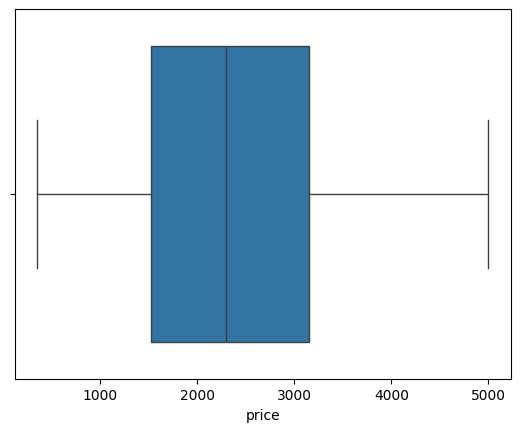

In [9]:
#Code for 'price' field
sns.boxplot(x = newdf['price'])

<Axes: xlabel='square'>

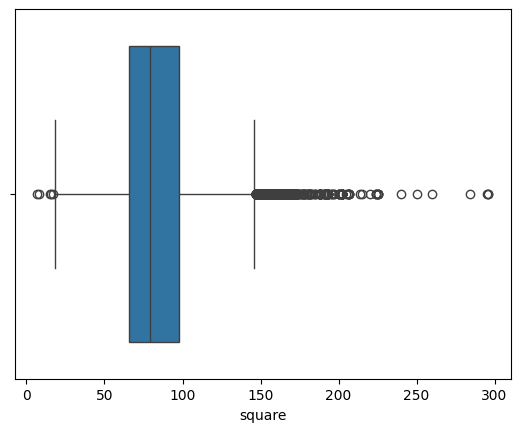

In [10]:
#Code for 'square' field
sns.boxplot(x = newdf['square'])

<Axes: xlabel='bedrooms'>

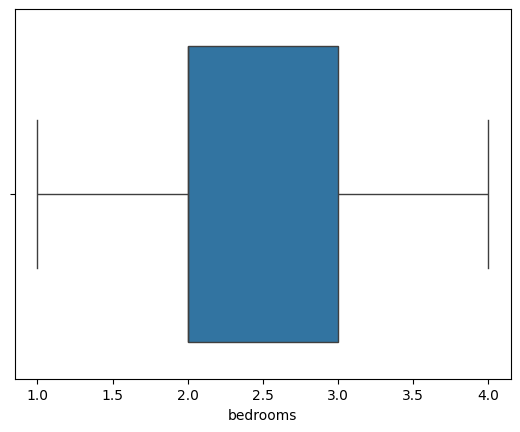

In [11]:
#Code for 'bedrooms' field
sns.boxplot(x = newdf['bedrooms'])

<Axes: xlabel='bathrooms'>

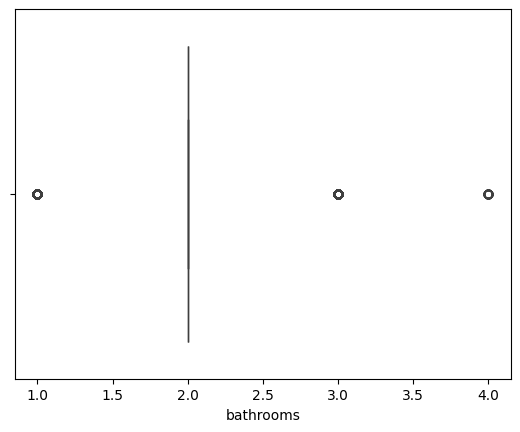

In [12]:
#Code for 'bathrooms' field
sns.boxplot(x = newdf['bathrooms'])

2. Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

  month  number of records
0    03                 14
1    04                 35
2    05                150
3    06              11173
4    07              12821
5    08              12440
6    09              12170
7    10              13793
8    11               9473
9    12               9093


C:\Users\Kien\AppData\Local\Temp\ipykernel_16440\877795217.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


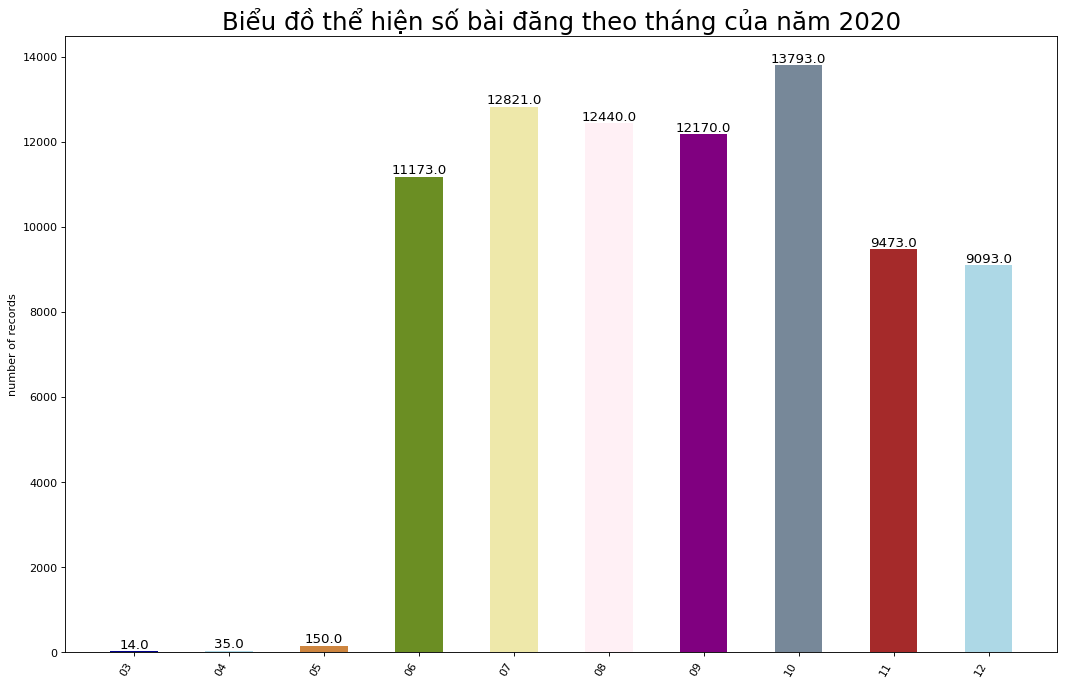

In [13]:
#.groupby('month'):Nhóm dữ liệu trong newdf theo cột month, tức là phân chia dữ liệu thành các nhóm tương ứng với mỗi tháng.
#.size(): in this context, là số bản ghi 1 tháng
#.reset_index(name = ' ') -> một data frame mới có 2 cột month và number...
df1 = newdf.groupby('month').size().reset_index(name='number of records')
print(df1)
#unique(): hàm để chắc chắn các ptu là duy nhất
#__len__() như len()
n = df1['month'].unique().__len__()+1 #-> số lượng màu
all_colors = list(plt.cm.colors.cnames.keys()) #danh sách các màu có sẵn trong Matplotlib

random.seed(100)
#đảm bảo tất cả các random sau có thể tái tạo kết quả

c = random.choices(all_colors, k=n)
#all_colors ở đây: là danh sách hoặc tập hợp chứa các màu sắc (hoặc bất kỳ loại giá trị nào) mà bạn muốn chọn từ đó.
#k=n chỉ định số lượng phần tử bạn muốn chọn. Giá trị n là một số nguyên dương, tức là bạn sẽ nhận được n phần tử ngẫu nhiên từ all_colors.

plt.figure(figsize=(16,10), dpi= 80)
#Tạo một khung hình có kích thước 16x10 inches với độ phân giải 80 dpi.

plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
#df1['month']: Các giá trị trên trục x là các tháng.
#df1['number of records']: y
#color lấy từ tập c
#width: độ rộng cột


for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
#gán giá trị
#plt.text(i, val, float(val), ...): Thêm nhãn với giá trị val (tức là số bài đăng) tại vị trí tương ứng trên trục x (vị trí i) và 
# trục y (giá trị val).
# horizontalalignment='center': Căn giữa theo chiều ngang.
# verticalalignment='bottom': Căn theo chiều dọc ở phía dưới.
# fontdict={'fontweight':500, 'size':12}: Đặt kiểu chữ cho nhãn với độ đậm 500 và kích thước 12.


plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
#set_xticklabels(df1['month'], rotation=60, horizontalalignment='right'): 
# Đặt nhãn cho trục x là các tháng trong df1['month'], xoay 60 độ và căn chỉnh về phía phải.
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

  month  giá nhà đất trung bình theo tháng
0    03                        1997.071429
1    04                        1844.828571
2    05                        2165.094333
3    06                        2332.939121
4    07                        2355.894837
5    08                        2380.929889
6    09                        2389.145440
7    10                        2425.983509
8    11                        2481.793916
9    12                        2509.592399
12


C:\Users\Kien\AppData\Local\Temp\ipykernel_16440\504000161.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


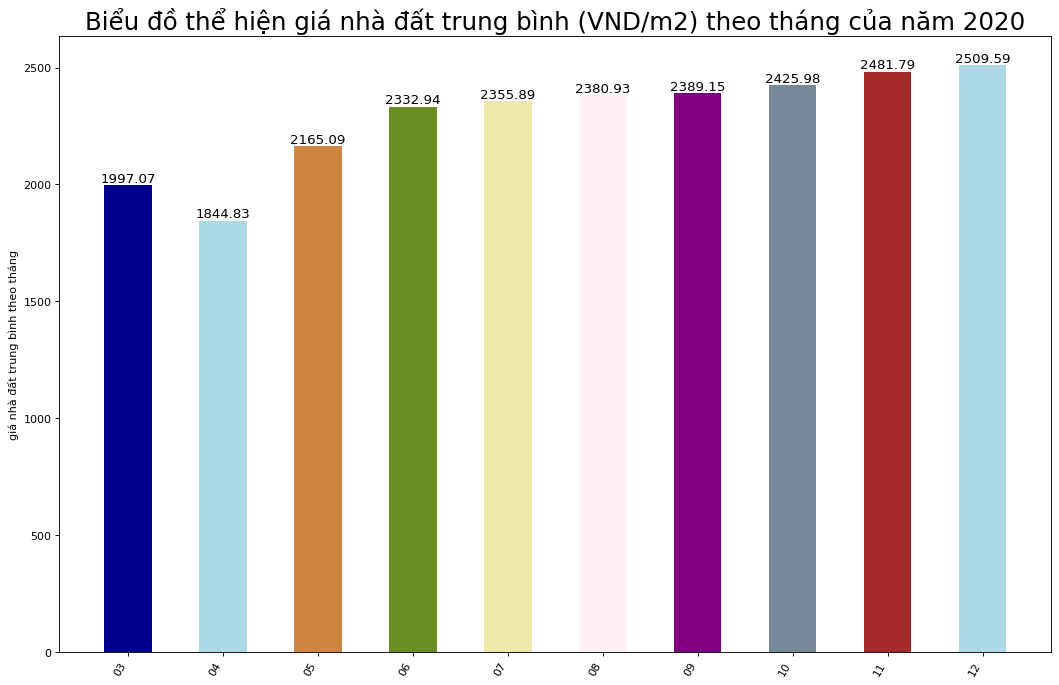

In [14]:
#Code ở đây
df2 = newdf.groupby('month')['price'].mean().reset_index(name='giá nhà đất trung bình theo tháng')
print(df2)
n = len(newdf['month'].unique()) + 1
print(n)
all_colors = list(plt.cm.colors.cnames.keys()) 

random.seed(100)

colors = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['month'], df2['giá nhà đất trung bình theo tháng'], color=c, width=.5)
for i, val in enumerate(df2['giá nhà đất trung bình theo tháng'].values):
    plt.text(i, val, f'{val:.2f}', horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
#set_xticklabels(df1['month'], rotation=60, horizontalalignment='right'): 
# Đặt nhãn cho trục x là các tháng trong df1['month'], xoay 60 độ và căn chỉnh về phía phải.
plt.title("Biểu đồ thể hiện giá nhà đất trung bình (VND/m2) theo tháng của năm 2020", fontsize=22)
plt.ylabel('giá nhà đất trung bình theo tháng')
plt.show()




* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

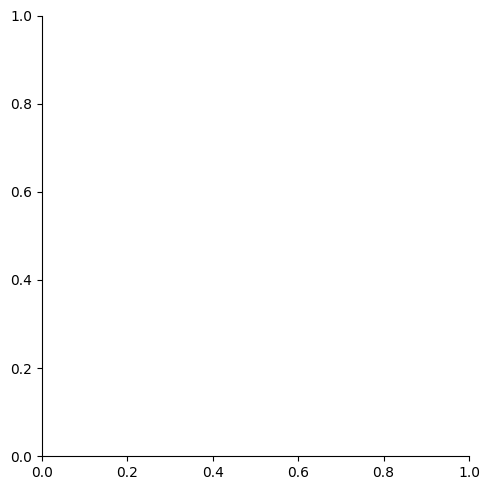

In [15]:
#Gọi ý: sns.displot()
sns.displot()

* Số lượng bất động sản phân theo số lượng bedrooms

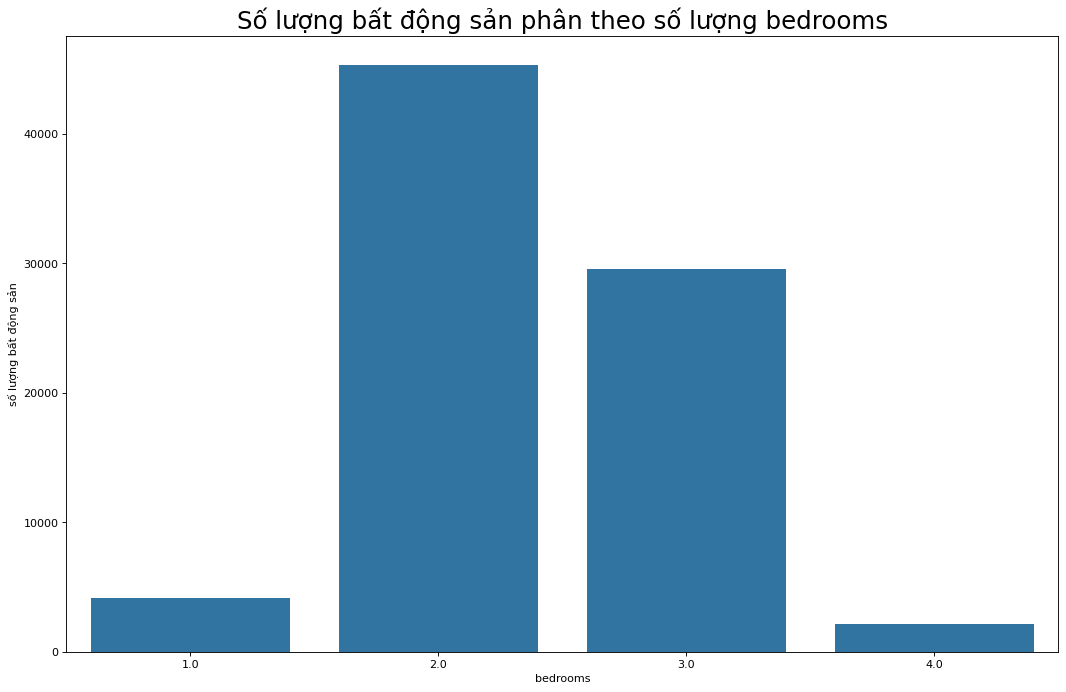

In [16]:
#Code ở đây
df3 = newdf.groupby('bedrooms').size().reset_index(name = 'số lượng bất động sản')
plt.figure(figsize=(16,10), dpi= 80)
sns.barplot(x='bedrooms', y= 'số lượng bất động sản', data= df3)
plt.title("Số lượng bất động sản phân theo số lượng bedrooms",fontsize = 22)
plt.show()

* Giá bất động sản trung bình theo số lượng bedrooms

In [17]:
# Code ở đây


* Giá nhà đất trung bình theo quận (VND/m2)

In [18]:
# Code ở đây
newdf['price_per_square'] = newdf['price']/newdf['square']
mean_prices_by_districts = newdf.groupby('district')['price_per_square'].mean().reset_index(name = 'mean prices by district')
print(mean_prices_by_districts)

        district  mean prices by district
0        ba dinh                41.751824
1    bac tu liem                29.743477
2       cau giay                33.344326
3      chuong my                12.541624
4     dan phuong                15.077385
5       dong anh                21.083223
6        dong da                33.609473
7        gia lam                28.460544
8        ha dong                20.286743
9   hai ba trung                36.897453
10      hoai duc                18.168771
11     hoan kiem                55.886964
12     hoang mai                22.646888
13     long bien                27.362581
14       me linh                14.305769
15   nam tu liem                31.595559
16      quoc oai                 9.960000
17        tay ho                38.198272
18    thach that                13.243636
19     thanh oai                14.268346
20     thanh tri                23.300391
21    thanh xuan                32.550206
22    thuong tin                13

* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

In [19]:
# Code ở đây
hoan_kiem_df = newdf[newdf['district'] == 'hoan kiem']
average_price_by_ward = hoan_kiem_df.groupby('ward')['price_per_square'].mean().reset_index()
print(average_price_by_ward)

              ward  price_per_square
0     chuong duong         37.656482
1         cua dong         53.334901
2          cua nam         50.928571
3        dong xuan         39.803922
4         hang bai         70.902520
5          hang bo         46.000000
6        hang buom         63.571429
7          hang ma         59.843750
8       ly thai to         34.222222
9   phan chu trinh         60.281251
10   tran hung dao         55.679657
11      trang tien         41.212121


* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

In [20]:
# Code ở đây
mean_price_by_investors = newdf.groupby('investor')['price_per_square'].mean().reset_index()
print(mean_price_by_investors)

                                              investor  price_per_square
0           Bộ Tham Mưu - Bộ Tư Lệnh Bộ Đội Biên Phòng         25.921384
1                                            C.T Group         30.880637
2                           Công TNHH Bắc Chương Dương         37.108589
3    Công Ty CP Đầu Tư Xây Dựng Và Địa Ốc  An Việt ...         29.029240
4                                     Công ty Booyoung         27.306768
..                                                 ...               ...
257  Tổng công ty Xây dựng Thanh Hóa - Công ty Cổ phần         48.920344
258  Tổng công ty Đầu tư Phát triển Hạ tầng đô thị ...         32.117313
259  Tổng công ty đầu tư phát triển nhà và đô thị B...         25.951589
260                                        Vimefulland         36.425518
261           Xí nghiệp Xây dựng Tư nhân Số 1 Lai Châu         15.833885

[262 rows x 2 columns]


* Giá nhà đất trung bình theo dự án (VND/m2)

In [21]:
# Code ở đây
mean_price_by_projects = newdf.groupby('project')['price_per_square'].mean()
print(mean_price_by_projects)

project
6th Element                  41.883108
A10-A14 Nam Trung Yên        29.914192
AQH Riverside                25.021484
AZ Lâm Viên Complex          27.678571
Amber Riverside              34.035547
                               ...    
Xuân Phương Garden           21.000000
Xuân Phương Residence        25.018071
Xuân Phương Tasco            21.938640
Yên Hòa Condominium          30.206031
Đồng Phát Park View Tower    23.044593
Name: price_per_square, Length: 620, dtype: float64


* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

In [22]:
# Code ở đây
top_10_investors = newdf.groupby('investor')['price_per_square'].mean().sort_values(ascending = False).head(10)
print(top_10_investors)

investor
Công ty CP Đầu tư Trúc Bạch                          61.363636
Tập đoàn Sun Group                                   56.661451
Tập đoàn Jaccar Bourbon                              55.095238
Công ty Liên doanh Hà Việt – Tungshing               51.587132
Công ty TNHH Đầu tư C.T.L                            50.702950
Công ty CP Đầu tư Phát triển nhà Gia Bảo             50.680296
Công ty CP Tân Phú Long                              50.422560
Tổng công ty Xây dựng Thanh Hóa - Công ty Cổ phần    48.920344
Công ty CP ACC - Thăng Long                          48.527896
Tập đoàn BRG                                         47.995171
Name: price_per_square, dtype: float64


* Giá bất động sản phân bố theo dự án

In [23]:
price_per_project = newdf.groupby('project')['price'].sum().reset_index()
print(price_per_project)

                       project       price
0                  6th Element  1140633.25
1        A10-A14 Nam Trung Yên   470214.80
2                AQH Riverside     9388.00
3          AZ Lâm Viên Complex    20380.00
4              Amber Riverside    97470.00
..                         ...         ...
615         Xuân Phương Garden     1953.00
616      Xuân Phương Residence    62327.30
617          Xuân Phương Tasco   123470.10
618        Yên Hòa Condominium    20559.00
619  Đồng Phát Park View Tower    99285.00

[620 rows x 2 columns]


* Giá nhà đất trung bình theo hướng nhà (VND/m2)

In [24]:
# Code ở đây
mean_price_by_direction = newdf.groupby('direction')['price_per_square'].mean()
print(mean_price_by_direction)

direction
Bắc         31.992040
Nam         33.370535
Tây         31.690466
Tây-Bắc     27.114705
Tây-Nam     26.975395
Đông        31.052281
Đông-Bắc    26.385299
Đông-Nam    26.779925
Name: price_per_square, dtype: float64


In [25]:
# Code ở đây

3. Tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* bieu do the hien he so tuong quan giua cac cap bien so thuc banggf biểu đồ heatmap

<Axes: >

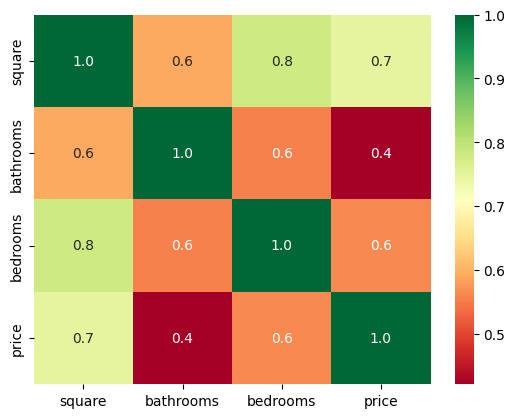

In [29]:
# Gợi ý: sns.heatmap(cmap='RdYlGn', ...)
newdf_real_numbers = newdf.loc[:, ['square', 'bathrooms', 'bedrooms', 'price']].dropna()
corr_matrix = newdf_real_numbers.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='RdYlGn')

* bieu do the hien moi quan he giua cac bien so thuc với biểu đồ phân tán

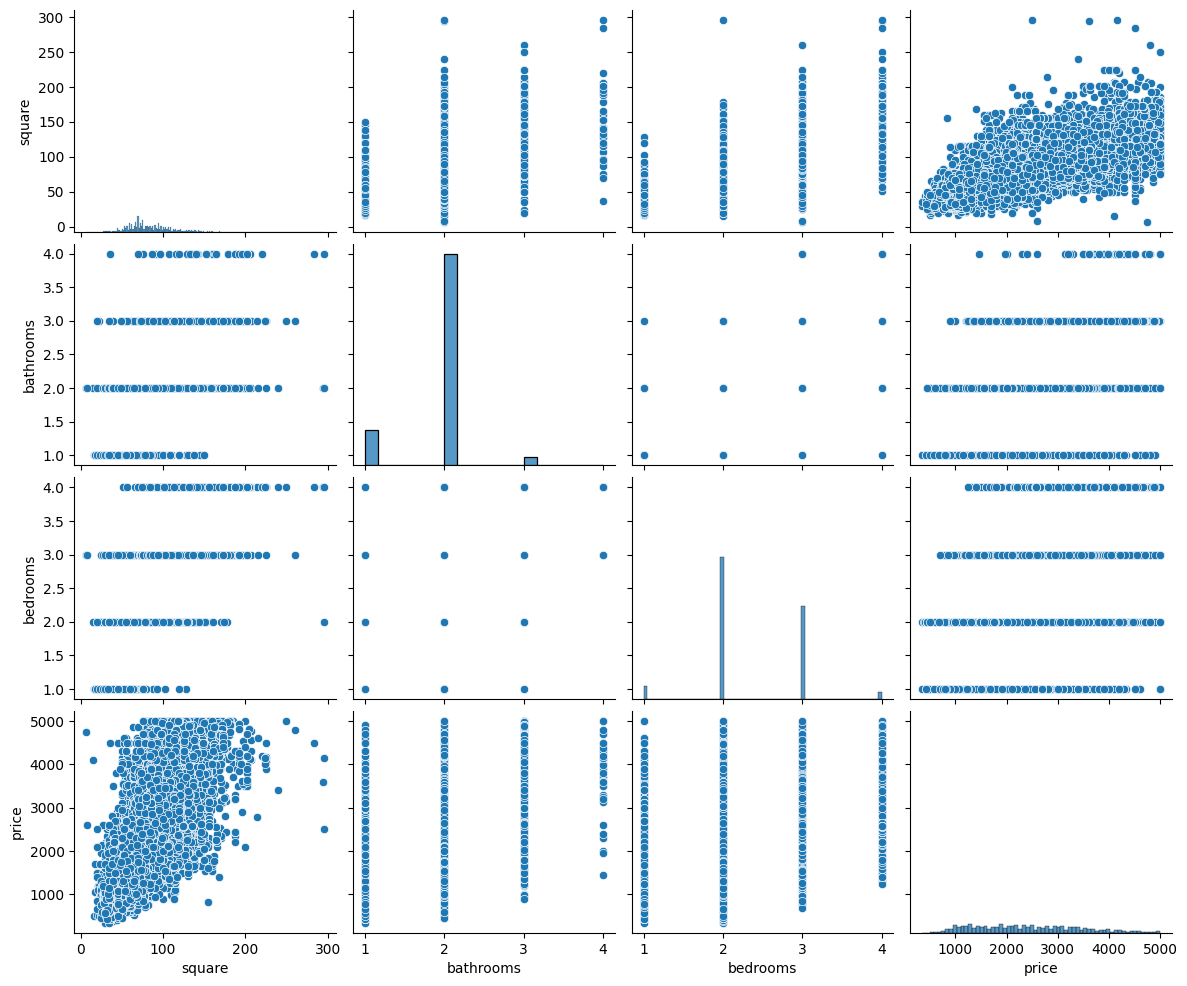

In [31]:
#Gợi ý: sns.pairplot(kind='scatter', ...)
sns.pairplot(newdf_real_numbers, kind='scatter', height=2.5, aspect=1.2)
plt.show()


4. Mật độ giá nhà trung bình theo quận 

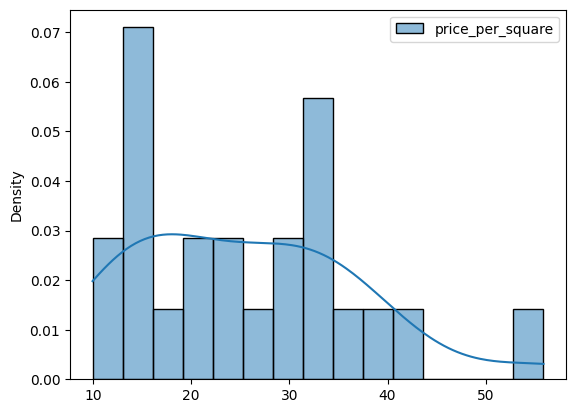

In [32]:
#Gợi ý: sns.displot()
price_by_district = newdf.groupby('district')['price_per_square'].mean().reset_index()
sns.histplot(price_by_district, kde=True, color='red',stat='density', bins=15)
plt.show()

End :))